In [6]:
!pip install openpyxl


In [41]:
import numpy as np
import pandas as pd

def flag_trophy(text):

    if pd.isna(text):
        return 0

    s = str(text).strip().lower()


    if s in ["", "none", "no trophy", "nan"]:
        return 0


    return 1

df["has_trophy"] = df["trophies_text"].apply(flag_trophy).astype(int)


print("Unique has_trophy values:", df["has_trophy"].unique())


print(df[["season", "coach_name", "trophies_text", "has_trophy"]].head(10))


Unique has_trophy values: [0 1]
      season     coach_name         trophies_text  has_trophy
0  2005-2006  Cristoph Daum                   NaN           0
1  2006-2007    Arthur Zico    Turkish League Cup           1
2  2007-2008    Arthur Zico                   NaN           0
3  2008-2009  Luis Aragonés                   NaN           0
4  2009-2010  Cristoph Daum                   NaN           0
5  2010-2011  Aykut Kocaman    Turkish League Cup           1
6  2011-2012  Aykut Kocaman  Turkish National Cup           1
7  2012-2013  Aykut Kocaman                   NaN           0
8  2013-2014    Ersun Yanal    Turkish League Cup           1
9  2014-2015  İsmail Kartal                   NaN           0


In [42]:
import pandas as pd

base_url = "https://raw.githubusercontent.com/tibetarastirek111/Fenerbahce-coach-analysis/main/data/raw/"

url1 = base_url + "fenerbahce_coaches_data.xlsx"
url2 = base_url + "fenerbahce_coaches_data2.xlsx"
url3 = base_url + "fenerbahce_coaches_data3.xlsx"

df1 = pd.read_excel(url1)
df2 = pd.read_excel(url2)
df3 = pd.read_excel(url3)

df = df1.copy()
df.head()


,season,coach_name,is_foreign,nationality,total_matches,win,draw,loss,points_per_game,win_rate,avg_goals_scored,avg_goals_conceded,trophies_text,has_trophy,season_start_year
0,2005-2006,Cristoph Daum,1,Foreign - Germany,49,31,9,9,2.081633,0.632653,2.4,1.2,NaN,0,2005
1,2006-2007,Arthur Zico,1,Foreign - Brazil,54,33,13,8,2.074074,0.611111,2.2,1.0,Turkish League Cup,1,2006
2,2007-2008,Arthur Zico,1,Foreign - Brazil,53,30,14,9,1.962264,0.566038,1.9,1.1,NaN,0,2007
3,2008-2009,Luis Aragonés,1,Foreign - Spain,46,23,12,11,1.760870,0.500000,1.5,1.0,NaN,0,2008
4,2009-2010,Cristoph Daum,1,Foreign - Germany,46,28,10,8,2.043478,0.608696,1.8,0.9,NaN,0,2009


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              25 non-null     object 
 1   coach_name          25 non-null     object 
 2   is_foreign          25 non-null     int64  
 3   nationality         25 non-null     object 
 4   total_matches       25 non-null     int64  
 5   win                 25 non-null     int64  
 6   draw                25 non-null     int64  
 7   loss                25 non-null     int64  
 8   points_per_game     25 non-null     float64
 9   win_rate            25 non-null     float64
 10  avg_goals_scored    25 non-null     float64
 11  avg_goals_conceded  25 non-null     float64
 12  trophies_text       5 non-null      object 
 13  has_trophy          25 non-null     int64  
 14  season_start_year   25 non-null     int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 3.1+ KB


In [53]:

df['win_rate'] = df['win'] / df['total_matches']


df['has_trophy'] = df['has_trophy'].astype(int)


In [52]:
# --- Descriptive Statistics by Nationality (Turkish vs Foreign) ---

import pandas as pd

# Coach type labels
df['coach_type'] = df['is_foreign'].map({0: 'Turkish', 1: 'Foreign'})

# Select metrics to summarize
metrics = ['points_per_game', 'win_rate', 'avg_goals_scored', 'avg_goals_conceded', 'has_trophy']

# Group by nationality and calculate descriptive statistics
nationality_stats = df.groupby('coach_type')[metrics].agg(['mean', 'median', 'std', 'min', 'max'])

display(nationality_stats)


points_per_game                                          win_rate  \
                      mean    median       std       min       max      mean   
coach_type                                                                     
Foreign           1.848155  2.002871  0.341562  0.933333  2.088235  0.529784   
Turkish           2.005978  2.000000  0.289659  1.444444  2.440000  0.589860   

                                                   avg_goals_scored         \
              median       std       min       max             mean median   
coach_type                                                                   
Foreign     0.581264  0.128759  0.200000  0.632653         1.700000   1.75   
Turkish     0.600000  0.117867  0.333333  0.760000         1.746154   1.70   

                               avg_goals_conceded                             \
                 std  min  max               mean median       std  min  max   
coach_type                                                                     
Foreign     0.443129  0.8  2.4           1.050000    1.0  0.188294  0.8  1.5   
Turkish     0.250384  1.4  2.3           1.038462    1.1  0.180455  0.7  1.3   

           has_trophy                           
                 mean median       std min max  
coach_type                                      
Foreign      0.166667    0.0  0.389249   0   1  
Turkish      0.230769    0.0  0.438529   0   1

Average Points Per Game by Coach Nationality:


,is_foreign,points_per_game,coach_type
0,0,2.005978,Turkish
1,1,1.848155,Foreign


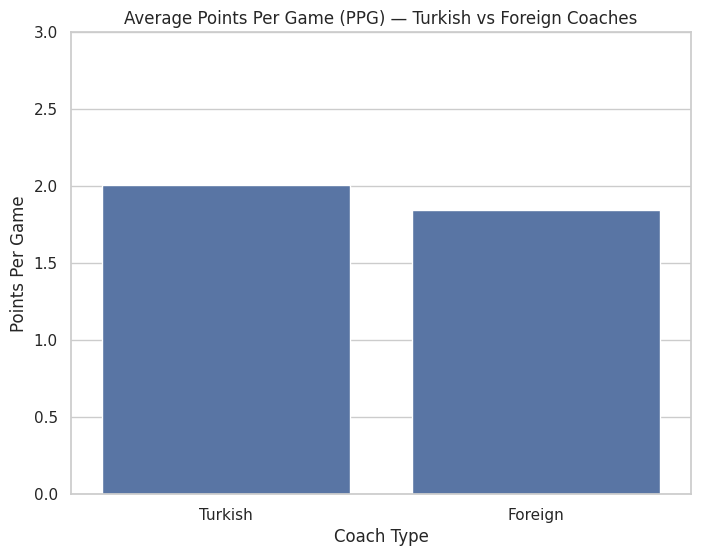

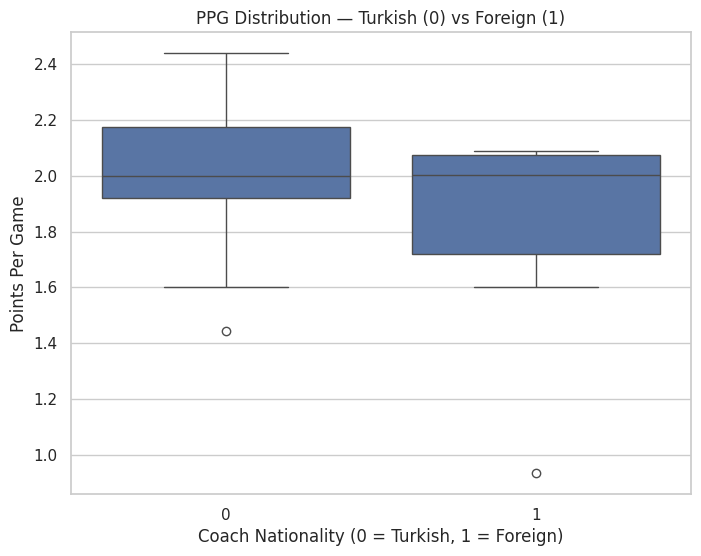

In [51]:
# --- PPG Comparison: Turkish vs Foreign Coaches ---

import matplotlib.pyplot as plt
import seaborn as sns

# Grouped mean PPG by nationality
ppg_summary = df.groupby("is_foreign")["points_per_game"].mean().reset_index()
ppg_summary["coach_type"] = ppg_summary["is_foreign"].map({0: "Turkish", 1: "Foreign"})

print("Average Points Per Game by Coach Nationality:")
display(ppg_summary)

# Bar Plot
plt.figure(figsize=(8,6))
sns.barplot(data=ppg_summary, x="coach_type", y="points_per_game")
plt.title("Average Points Per Game (PPG) — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Points Per Game")
plt.ylim(0, 3)
plt.show()

# Boxplot for distribution comparison
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="is_foreign", y="points_per_game")
plt.title("PPG Distribution — Turkish (0) vs Foreign (1)")
plt.xlabel("Coach Nationality (0 = Turkish, 1 = Foreign)")
plt.ylabel("Points Per Game")
plt.show()


Win Rate Summary (Turkish vs Foreign):


,mean,median,std,min,max
coach_type,,,,,
Foreign,0.529784,0.581264,0.128759,0.200000,0.632653
Turkish,0.589860,0.600000,0.117867,0.333333,0.760000


/tmp/ipython-input-503302261.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="coach_type", y="win_rate", ci=None)


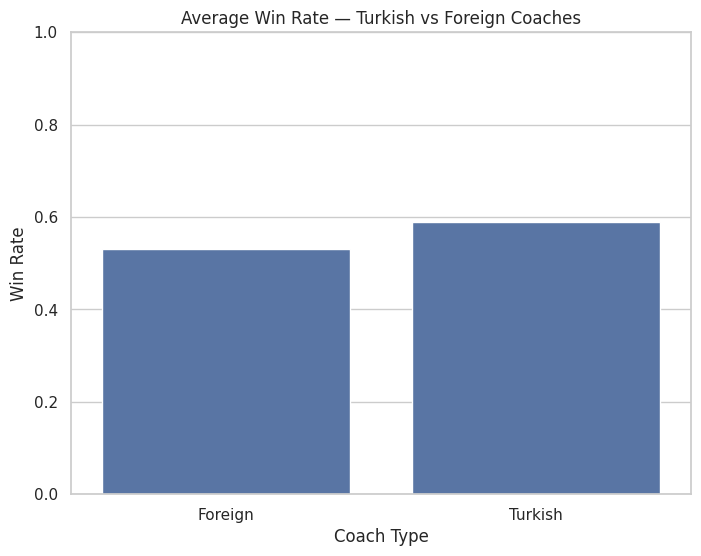

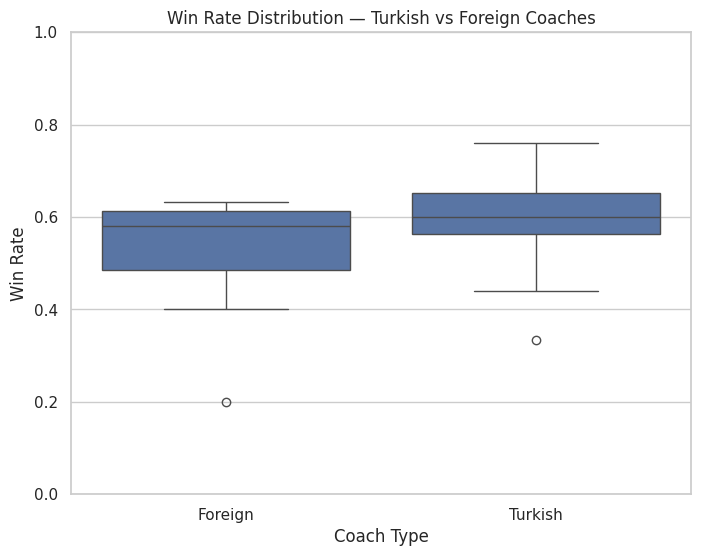

In [54]:
#Win Rate Analysis
#Comparison of win percentages between groups.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add readable coach type
df['coach_type'] = df['is_foreign'].map({0: 'Turkish', 1: 'Foreign'})

# 1) Summary table of win rate by nationality
win_rate_stats = df.groupby("coach_type")["win_rate"].agg(["mean", "median", "std", "min", "max"])
print("Win Rate Summary (Turkish vs Foreign):")
display(win_rate_stats)

# 2) Bar plot of average win rate
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="win_rate", ci=None)
plt.title("Average Win Rate — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()

# 3) Boxplot for win rate distribution
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="win_rate")
plt.title("Win Rate Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()


Goal Performance Summary (Turkish vs Foreign):


avg_goals_scored                            avg_goals_conceded  \
                       mean median       std  min  max               mean   
coach_type                                                                  
Foreign            1.700000   1.75  0.443129  0.8  2.4           1.050000   
Turkish            1.746154   1.70  0.250384  1.4  2.3           1.038462   

                                       
           median       std  min  max  
coach_type                             
Foreign       1.0  0.188294  0.8  1.5  
Turkish       1.1  0.180455  0.7  1.3

/tmp/ipython-input-2897795813.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="coach_type", y="avg_goals_scored", ci=None)


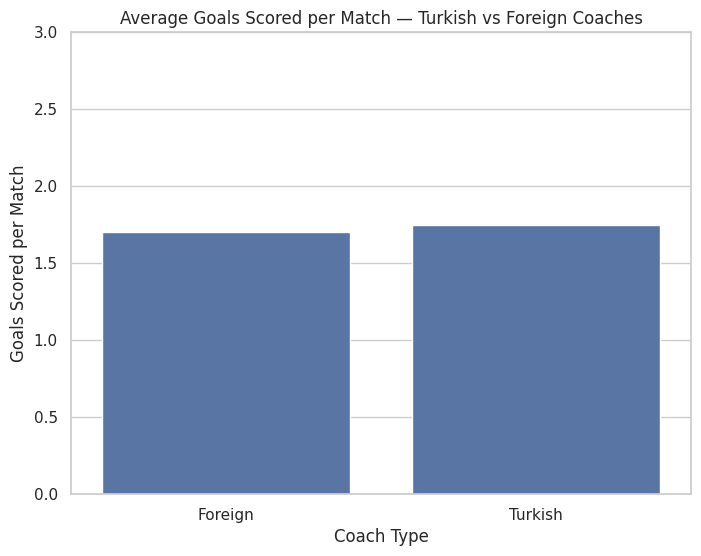

/tmp/ipython-input-2897795813.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="coach_type", y="avg_goals_conceded", ci=None)


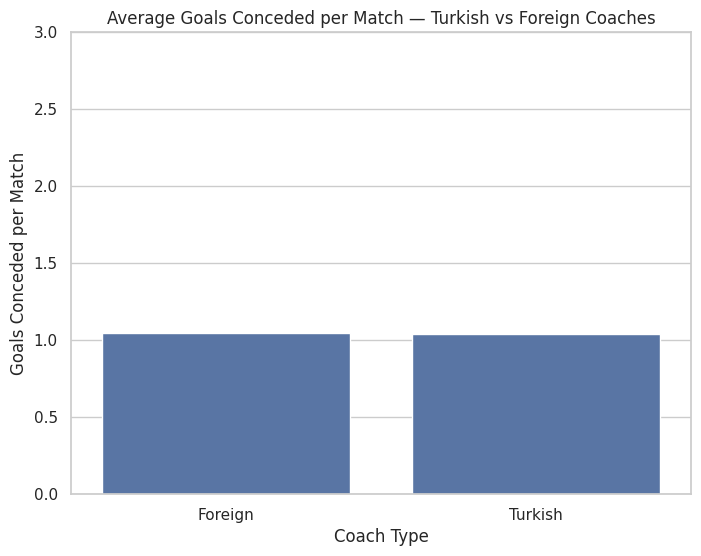

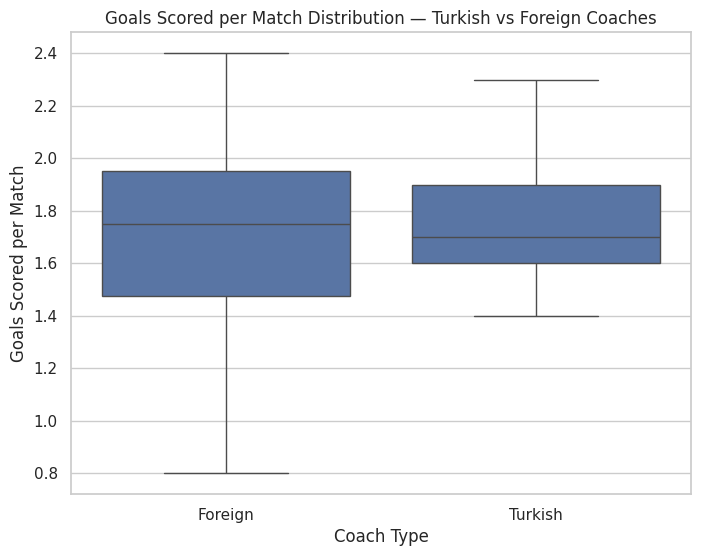

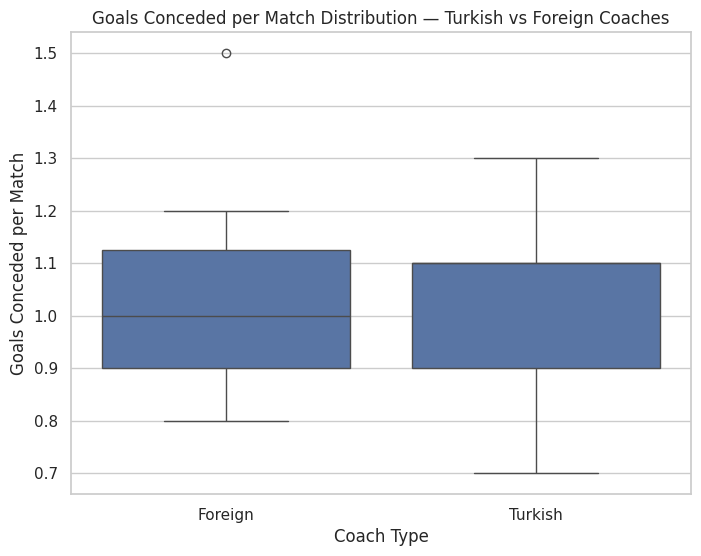

In [55]:
#Goal Performance
#Comparison of average goals scored and conceded per match for each nationality group.
# --- Goal Performance: Goals Scored & Conceded per Match by Nationality ---

import matplotlib.pyplot as plt
import seaborn as sns

# Readable coach type label
df['coach_type'] = df['is_foreign'].map({0: 'Turkish', 1: 'Foreign'})

# 1) Summary: average goals scored & conceded per match
goal_stats = df.groupby("coach_type")[["avg_goals_scored", "avg_goals_conceded"]].agg(["mean", "median", "std", "min", "max"])
print("Goal Performance Summary (Turkish vs Foreign):")
display(goal_stats)

# 2a) Bar plot — average goals scored
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="avg_goals_scored", ci=None)
plt.title("Average Goals Scored per Match — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Scored per Match")
plt.ylim(0, 3)
plt.show()

# 2b) Bar plot — average goals conceded
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="avg_goals_conceded", ci=None)
plt.title("Average Goals Conceded per Match — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Conceded per Match")
plt.ylim(0, 3)
plt.show()

# 3a) Boxplot — distribution of goals scored
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="avg_goals_scored")
plt.title("Goals Scored per Match Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Scored per Match")
plt.show()

# 3b) Boxplot — distribution of goals conceded
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="avg_goals_conceded")
plt.title("Goals Conceded per Match Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Conceded per Match")
plt.show()


Trophy Rate Summary (Turkish vs Foreign):


,total_seasons,seasons_with_trophy,trophy_rate
coach_type,,,
Foreign,12,2,0.166667
Turkish,13,3,0.230769


/tmp/ipython-input-167145646.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


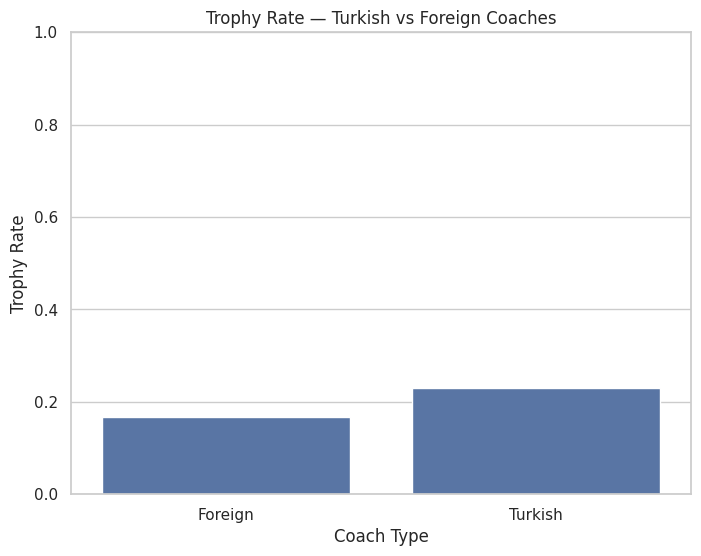

In [56]:
#Trophy Achievements
#Calculation of trophy rate:
#trophy_rate = total seasons with trophy / total seasons coached
#Comparison between Turkish and foreign coaches.
# --- Trophy Achievement Analysis: Turkish vs Foreign Coaches ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Coach type label
df['coach_type'] = df['is_foreign'].map({0: 'Turkish', 1: 'Foreign'})

# 1) Trophy rate computation
trophy_summary = df.groupby("coach_type")["has_trophy"].agg(
    total_seasons="count",
    seasons_with_trophy="sum",
)

# Calculate trophy_rate
trophy_summary["trophy_rate"] = trophy_summary["seasons_with_trophy"] / trophy_summary["total_seasons"]

print("Trophy Rate Summary (Turkish vs Foreign):")
display(trophy_summary)

# 2) Bar Plot — Trophy Rate
plt.figure(figsize=(8,6))
sns.barplot(
    data=trophy_summary.reset_index(),
    x="coach_type",
    y="trophy_rate",
    ci=None
)
plt.title("Trophy Rate — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Trophy Rate")
plt.ylim(0, 1)
plt.show()


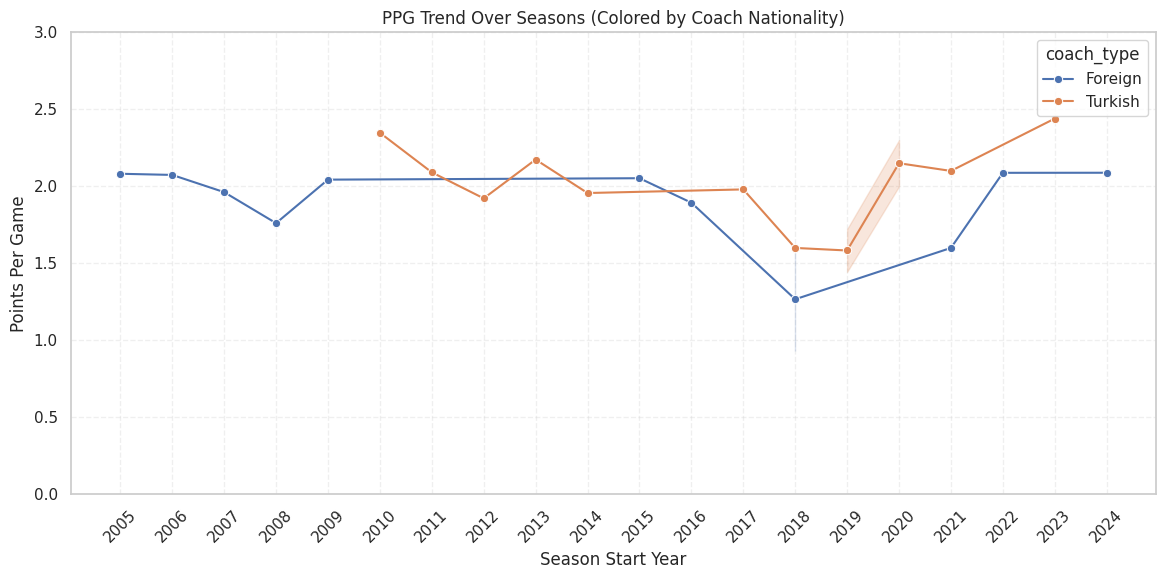

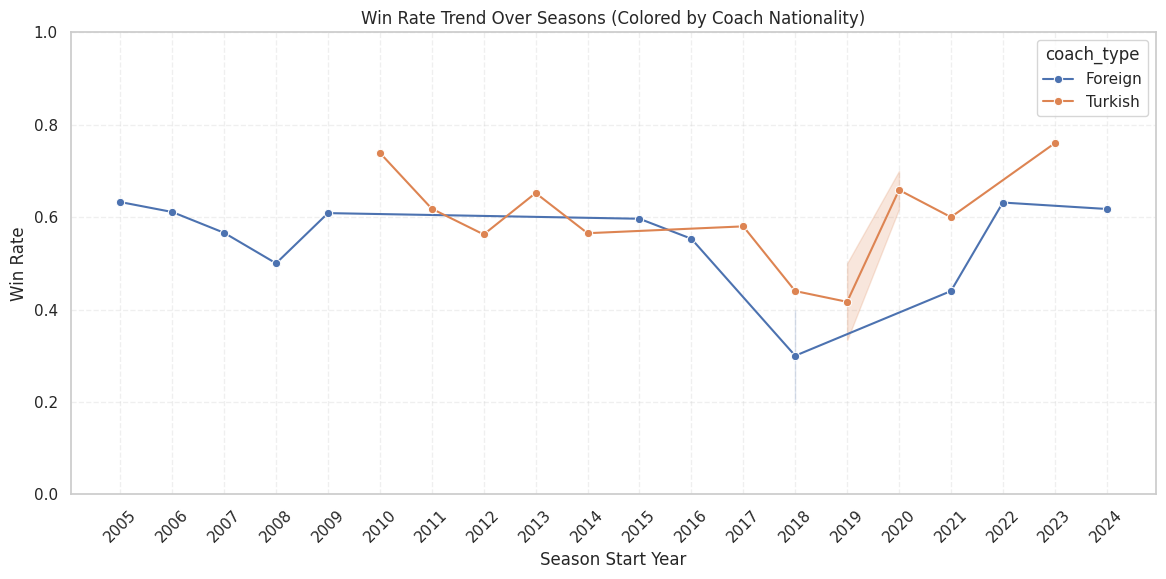

In [57]:
#Trend Over Time
#Line plots of PPG and win rate over seasons, colored by coach nationality.
#Identification of periods dominated by domestic or foreign coaches.
# --- Trend Over Time: PPG and Win Rate by Season and Nationality ---

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct season sorting
df_sorted = df.sort_values("season_start_year")

# Coach type label
df_sorted["coach_type"] = df_sorted["is_foreign"].map({0: "Turkish", 1: "Foreign"})

# 1) PPG Trend Over Time
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_sorted,
    x="season_start_year",
    y="points_per_game",
    hue="coach_type",
    marker="o"
)
plt.title("PPG Trend Over Seasons (Colored by Coach Nationality)")
plt.xlabel("Season Start Year")
plt.ylabel("Points Per Game")
plt.xticks(df_sorted["season_start_year"].unique(), rotation=45)
plt.ylim(0, 3)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

# 2) Win Rate Trend Over Time
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_sorted,
    x="season_start_year",
    y="win_rate",
    hue="coach_type",
    marker="o"
)
plt.title("Win Rate Trend Over Seasons (Colored by Coach Nationality)")
plt.xlabel("Season Start Year")
plt.ylabel("Win Rate")
plt.xticks(df_sorted["season_start_year"].unique(), rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In [61]:
# --- COACH-LEVEL SUMMARY TABLE (ALL COACHES) ---

# Get all unique coaches in dataset
all_coaches = df["coach_name"].unique()

# Filter dataframe (optional, but keeps structure)
coach_df = df[df["coach_name"].isin(all_coaches)]

# Group and summarize
coach_summary = coach_df.groupby("coach_name").agg(
    seasons=("season", "count"),
    avg_ppg=("points_per_game", "mean"),
    avg_win_rate=("win_rate", "mean"),
    avg_goals_scored=("avg_goals_scored", "mean"),
    avg_goals_conceded=("avg_goals_conceded", "mean"),
    total_trophies=("has_trophy", "sum")
).reset_index()

print("Coach-Level Summary (All Coaches):")
display(coach_summary.round(3))


Coach-Level Summary (All Coaches):


,coach_name,seasons,avg_ppg,avg_win_rate,avg_goals_scored,avg_goals_conceded,total_trophies
0,Arthur Zico,2,2.018,0.589,2.050,1.050,1
1,Aykut Kocaman,4,2.085,0.625,1.800,1.025,2
2,Cristoph Daum,2,2.063,0.621,2.100,1.050,0
3,Dick Advocaat,1,1.894,0.553,1.700,1.100,0
4,Emre Belözoğlu,1,2.300,0.700,1.800,1.100,0
5,Erol Bulut,1,2.000,0.618,1.800,1.100,0
6,Ersun Yanal,3,1.832,0.531,1.667,1.100,1
7,Erwin Koeman,1,1.600,0.400,1.200,1.200,0
8,Jorge Jesus,1,2.088,0.632,2.100,0.900,1
9,Jose Mourinho,1,2.088,0.618,1.800,0.900,0


/tmp/ipython-input-2779851487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_ppg, x="avg_ppg", y="coach_name", palette="Blues_r")


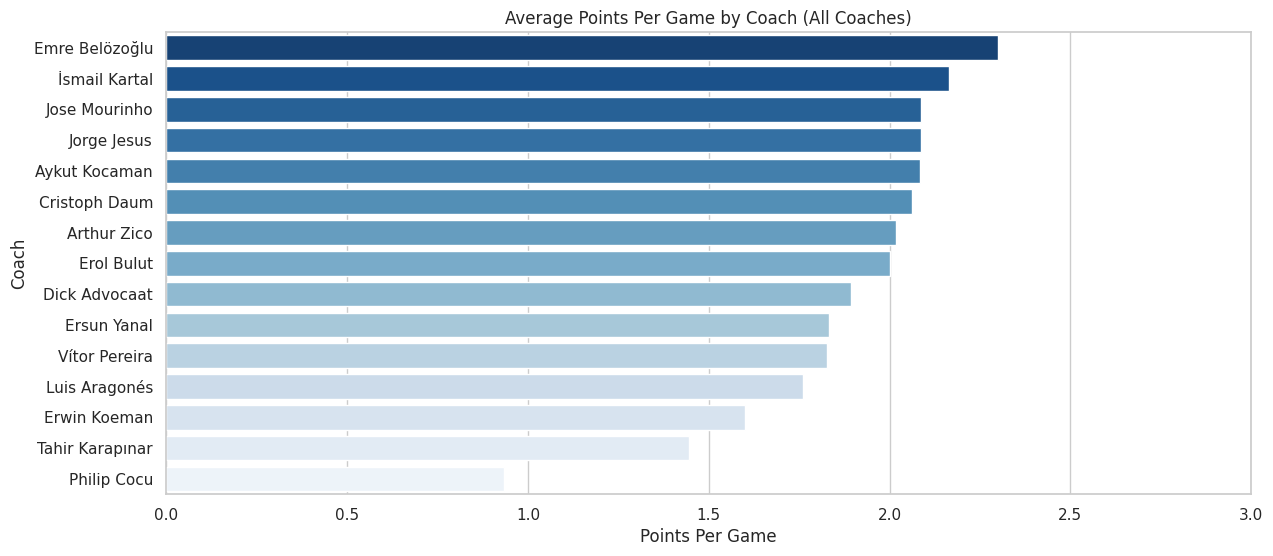

In [62]:
# --- Coach Comparison: Points Per Game (All Coaches) ---

sorted_ppg = coach_summary.sort_values("avg_ppg", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=sorted_ppg, x="avg_ppg", y="coach_name", palette="Blues_r")
plt.title("Average Points Per Game by Coach (All Coaches)")
plt.xlabel("Points Per Game")
plt.ylabel("Coach")
plt.xlim(0, 3)
plt.show()


/tmp/ipython-input-144701619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_wr, x="avg_win_rate", y="coach_name", palette="Greens_r")


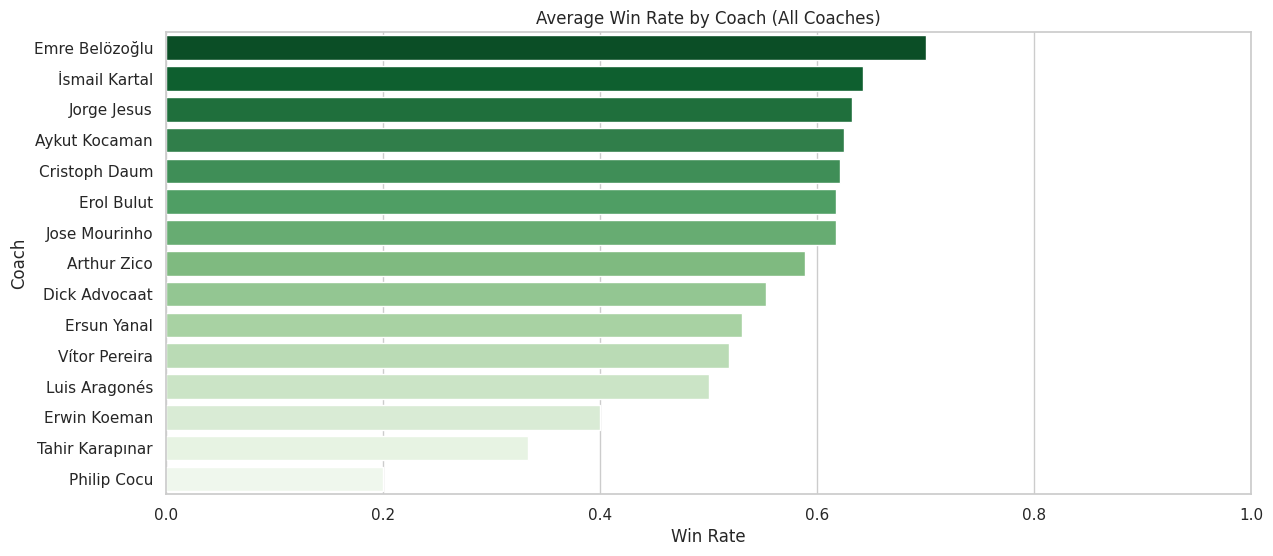

In [64]:
# --- Coach Comparison: Win Rate (All Coaches) ---

sorted_wr = coach_summary.sort_values("avg_win_rate", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=sorted_wr, x="avg_win_rate", y="coach_name", palette="Greens_r")
plt.title("Average Win Rate by Coach (All Coaches)")
plt.xlabel("Win Rate")
plt.ylabel("Coach")
plt.xlim(0, 1)
plt.show()


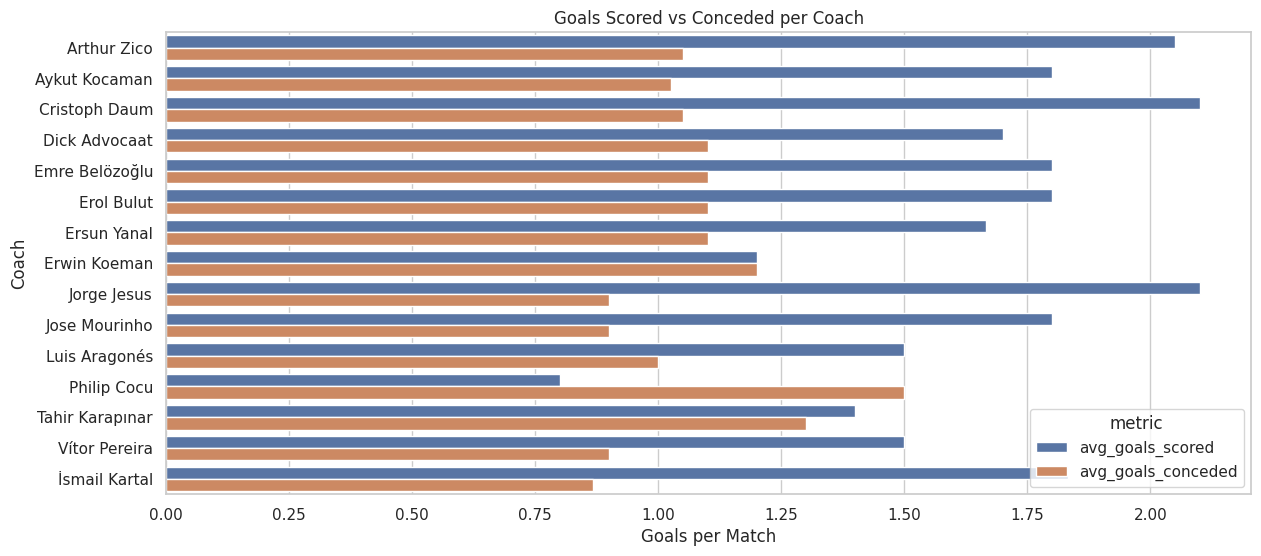

In [65]:
# --- Goals Scored vs Conceded per Coach (All Coaches) ---

goals_melted = coach_summary.melt(
    id_vars="coach_name",
    value_vars=["avg_goals_scored", "avg_goals_conceded"],
    var_name="metric",
    value_name="value"
)

plt.figure(figsize=(14,6))
sns.barplot(data=goals_melted, x="value", y="coach_name", hue="metric")
plt.title("Goals Scored vs Conceded per Coach")
plt.xlabel("Goals per Match")
plt.ylabel("Coach")
plt.show()


/tmp/ipython-input-2979075982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_trophies, x="total_trophies", y="coach_name", palette="Oranges_r")


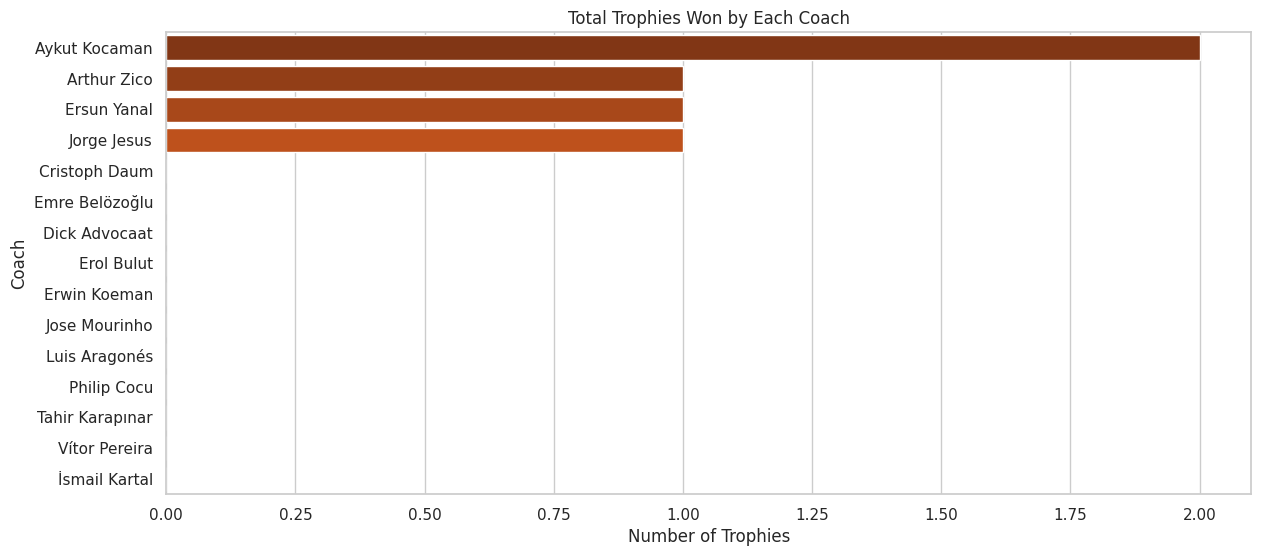

In [66]:
# --- Trophy Count Comparison (All Coaches) ---

sorted_trophies = coach_summary.sort_values("total_trophies", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=sorted_trophies, x="total_trophies", y="coach_name", palette="Oranges_r")
plt.title("Total Trophies Won by Each Coach")
plt.xlabel("Number of Trophies")
plt.ylabel("Coach")
plt.show()
